In [2]:
import numpy as np
from scipy import stats
import re
import sys
import matplotlib.pyplot as plt
sys.path.insert(0, "../../")
from common import data_utils as data_utils

In [3]:
folder = "../../data/waf/raw/"

In [7]:
def read_cisc(file, lines):
    with open(str(folder + file), 'r', encoding="ascii", errors="backslashreplace") as f:
        for line in f:
            if re.findall(r'GET', line):
                aux = line.split('GET http://localhost:8080', 1)
                aux = aux[1].split(' HTTP/1.1\n',1)
                lines.append(aux[0])
            elif re.findall(r'POST', line):
                aux = line.split('POST http://localhost:8080', 1)
                aux= aux[1].split(' HTTP/1.1\n',1)
                aux = aux[0].rstrip()
                lines.append(aux)

In [19]:
def read(file, lines):
    with open(str(folder + file), 'r', encoding="ascii", errors="backslashreplace") as f:
        samples = list(f)
        print(samples[0])
        print(lines[0])
        lines.extend(samples)


In [20]:
lines = []
#read_cisc("csic_2010_anomalousTrafficTest.txt", lines)
print(len(lines))
read_cisc("csic_2010_normalTrafficTraining.txt", lines)
print(len(lines))
read_cisc("csic_2010_normalTrafficTest.txt", lines)
print(len(lines))
read("goodqueries.txt", lines)
print(len(lines))

0
36000
72000
/103886/

/tienda1/index.jsp
1366531


In [21]:
def ints_to_word(ints):
    word = ''
    for i in ints:
        word += chr(i)
    return word

In [22]:
def word_to_ints(word):
    word_ints = []
    for char in word:
        word_ints.append(ord(char))
    return word_ints + [256]

In [23]:
queries_ints = []

for query in lines:
    query_ints = word_to_ints(query)
    queries_ints.append(query_ints)

In [24]:
lens = [len(s) for s in queries_ints]

In [25]:
print(stats.mode(lens), np.median(lens), np.mean(lens), min(lens), max(lens))

ModeResult(mode=array([10]), count=array([187708])) 16.0 20.243997391936222 9 343


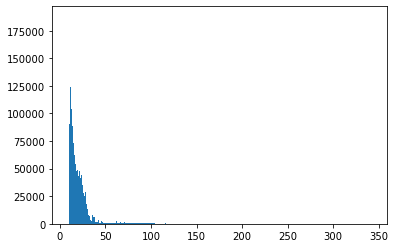

In [26]:
plt.hist(lens, bins=np.arange(min(lens), max(lens)+1), align='left')
plt.show()

In [27]:
data_utils.write_file(queries_ints, "normal.txt", split_token=' ', encoding='utf-8', errors='strict')